In [1]:
import mxnet as mx 
from symbol import get_resnet_model
from symbol import YOLO_loss
from data_ulti import get_iterator

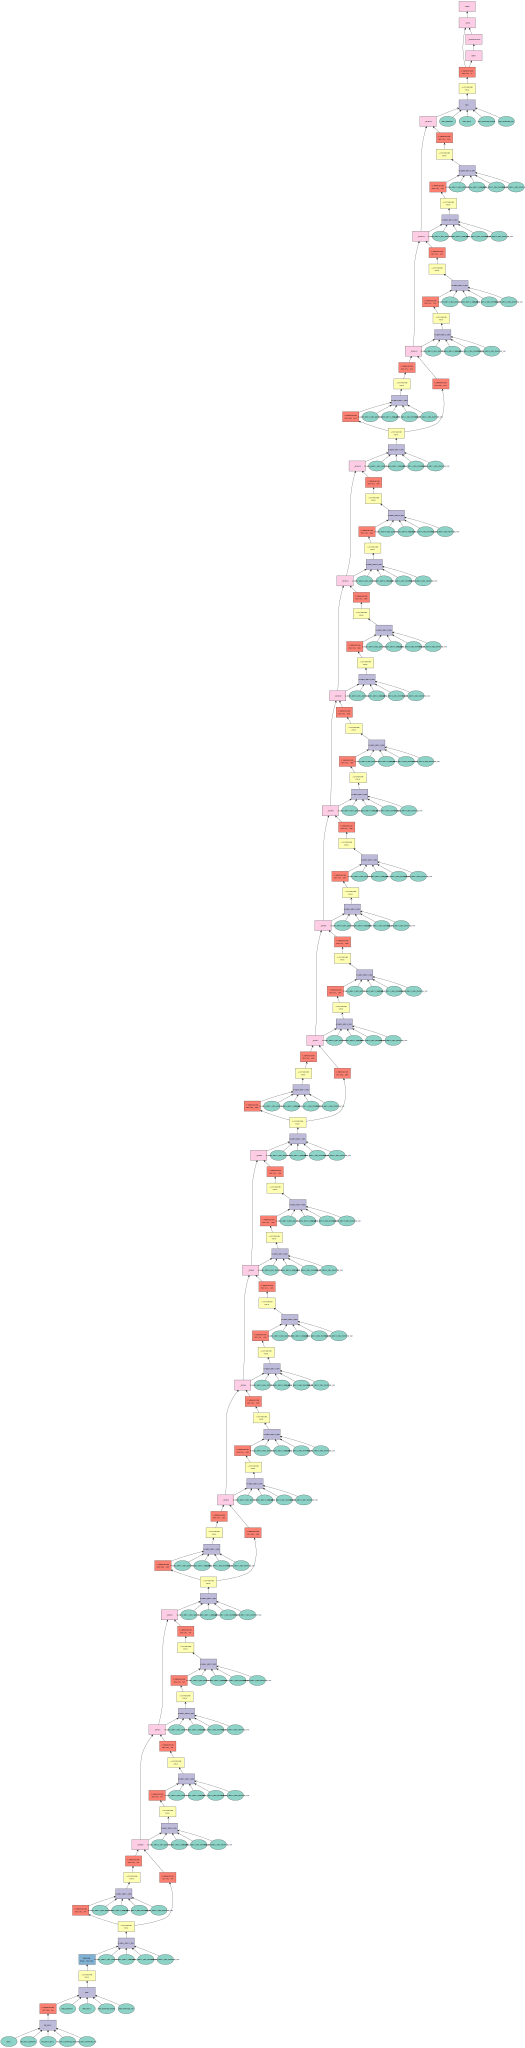

In [2]:
# get sym 
sym = get_resnet_model('pretrained_models/resnet-34', 0)
_, args_params, aux_params = mx.model.load_checkpoint('pretrained_models/resnet-34', 0)
logit = sym.get_internals()['logit_output']
mx.viz.plot_network(logit)

In [6]:
# get some input 
train_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)
val_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)

In [7]:
mod = mx.mod.Module(symbol=sym, context=mx.gpu(0))

In [8]:
mod.bind(train_data.provide_data, train_data.provide_label)

In [9]:
mod.init_params(allow_missing=True, arg_params=args_params, aux_params=aux_params, 
                initializer=mx.init.Xavier(magnitude=2,rnd_type='gaussian',factor_type='in'))

In [10]:
out = mod.predict(eval_data=train_data, num_batch=1)

In [11]:
out

[<NDArray 1x7x7x5 @gpu(0)>, <NDArray 1x49x1 @gpu(0)>]